<a href="https://colab.research.google.com/github/akfangus/MLproject/blob/main/%EC%B9%B4%EB%93%9C_%EC%97%B0%EC%B2%B4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm, skew

import os
from PIL import Image

style.use('seaborn-talk')

krfont={'family':'Malgun Gothic', 'weight': 'bold', 'size' : 10}
matplotlib.rc('font', **krfont)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline


## index
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
						['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식
							['Municipal apartment', 'House / apartment', 'With parents',
							 'Co-op apartment', 'Rented apartment', 'Office apartment']
- DAYS_BIRTH: 출생일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미



- DAYS_EMPLOYED: 업무 시작일


							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

													

							양수 값은 고용되지 않은 상태를 의미함



- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월
		
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미

- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도


							=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함

	

In [ ]:
train = pd.read_csv('open/train.csv')
test = pd.read_csv('open/test.csv')
submission = pd.read_csv('open/sample_submission.csv')


In [ ]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [ ]:
submission.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


# [데이터 전처리 및 EDA]
- (주의) train data에 해준 그대로 test data 전처리

In [ ]:
train.isna().sum(), train.shape

(index            0
 gender           0
 car              0
 reality          0
 child_num        0
 income_total     0
 income_type      0
 edu_type         0
 family_type      0
 house_type       0
 DAYS_BIRTH       0
 DAYS_EMPLOYED    0
 FLAG_MOBIL       0
 work_phone       0
 phone            0
 email            0
 family_size      0
 begin_month      0
 credit           0
 dtype: int64,
 (26457, 19))

- 'occyp_type'이 26000개 중 8171개가 결측치행으로 판단
- 해당 컬럼 삭제

In [ ]:
train=train.drop('occyp_type', axis=1)
test=test.drop('occyp_type', axis=1)

In [ ]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

(None, None)

- 타겟변수  credit의 분포 확인

C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


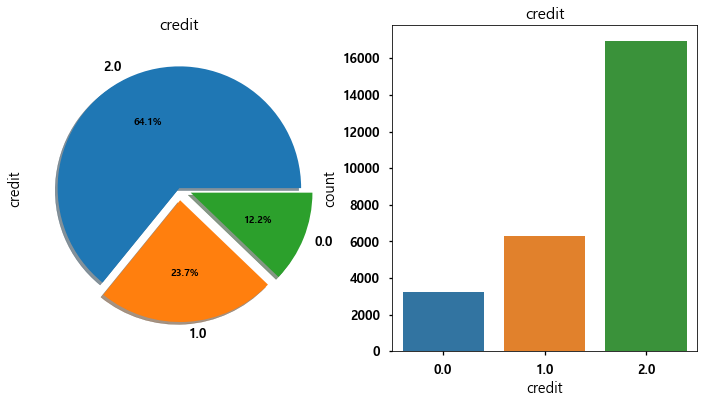

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

train['credit'].value_counts().plot.pie(explode=[0,0.1, 0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('credit')
ax[0].set_ylabel('credit')
sns.countplot('credit', data = train, ax=ax[1])
ax[1].set_title('credit')
plt.show()

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
train.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00,26457.00
mean,13228.00,0.43,187306.52,-15958.05,59068.75,1.00,0.22,0.29,0.09,2.20,-26.12,1.52
std,7637.62,0.75,101878.37,4201.59,137475.43,0.00,0.42,0.46,0.29,0.92,16.56,0.70
min,0.00,0.00,27000.00,-25152.00,-15713.00,1.00,0.00,0.00,0.00,1.00,-60.00,0.00
25%,6614.00,0.00,121500.00,-19431.00,-3153.00,1.00,0.00,0.00,0.00,2.00,-39.00,1.00
50%,13228.00,0.00,157500.00,-15547.00,-1539.00,1.00,0.00,0.00,0.00,2.00,-24.00,2.00
75%,19842.00,1.00,225000.00,-12446.00,-407.00,1.00,0.00,1.00,0.00,3.00,-12.00,2.00
max,26456.00,19.00,1575000.00,-7705.00,365243.00,1.00,1.00,1.00,1.00,20.00,0.00,2.00


C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

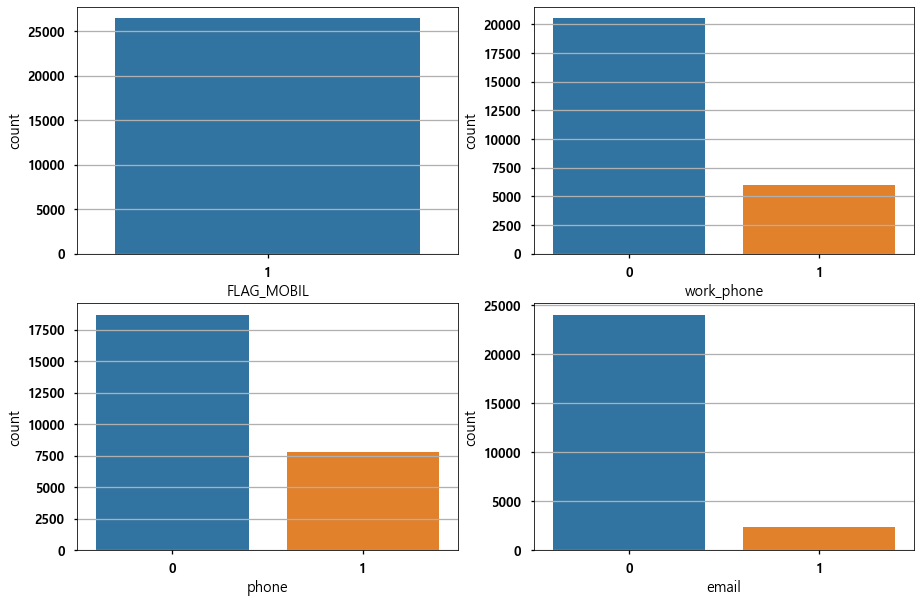

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(train['FLAG_MOBIL'], ax = ax[0][0])
ax[0][0].grid(axis='y')
sns.countplot(train['work_phone'], ax = ax[0][1])
ax[0][1].grid(axis='y')

sns.countplot(train['phone'], ax = ax[1][0])
ax[1][0].grid(axis='y')

sns.countplot(train['email'], ax = ax[1][1])
ax[1][1].grid(axis='y')

fig.show()

C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

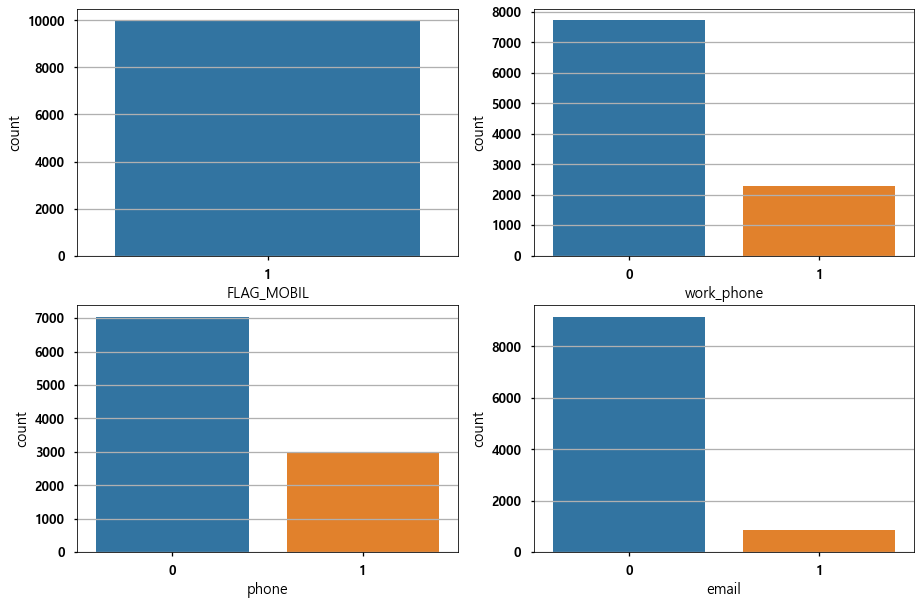

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.countplot(test['FLAG_MOBIL'], ax = ax[0][0])
ax[0][0].grid(axis='y')
sns.countplot(test['work_phone'], ax = ax[0][1])
ax[0][1].grid(axis='y')

sns.countplot(test['phone'], ax = ax[1][0])
ax[1][0].grid(axis='y')

sns.countplot(test['email'], ax = ax[1][1])
ax[1][1].grid(axis='y')

fig.show()

- 이상치 확인

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

- 기본 데이터 시각화
- 피쳐와 타겟간의 관계 시각화 및 피쳐 특징 식가화

In [ ]:
print(train.groupby('gender')['credit'].count())
print('='*50)
print(train.groupby('car')['credit'].count())
print('='*50)
print(train.groupby('reality')['credit'].count())
print('='*50)
print(train.groupby('edu_type')['credit'].count())
print('='*50)
print(train.groupby('family_type')['credit'].count())
print('='*50)
print(train.groupby('house_type')['credit'].count())

gender
F    17697
M     8760
Name: credit, dtype: int64
car
N    16410
Y    10047
Name: credit, dtype: int64
reality
N     8627
Y    17830
Name: credit, dtype: int64
edu_type
Academic degree                     23
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Secondary / secondary special    17995
Name: credit, dtype: int64
family_type
Civil marriage           2123
Married                 18196
Separated                1539
Single / not married     3496
Widow                    1103
Name: credit, dtype: int64
house_type
Co-op apartment          110
House / apartment      23653
Municipal apartment      818
Office apartment         190
Rented apartment         429
With parents            1257
Name: credit, dtype: int64


C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

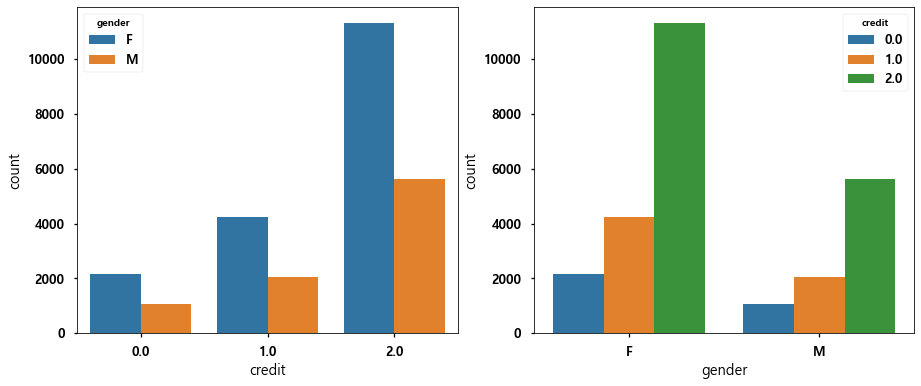

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.countplot('credit',data=train, hue='gender',ax=ax[0])
sns.countplot('gender',data=train, hue='credit',ax=ax[1])

- 성별로 보면 여성의 표본수가 2배 많아서 절대적인 수치는 높게 나온것
- 하지만 credit의 비율을 보면 남 녀 모두 비슷한 형태를 띔

C:\Users\sh.lee\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='family_type', ylabel='count'>

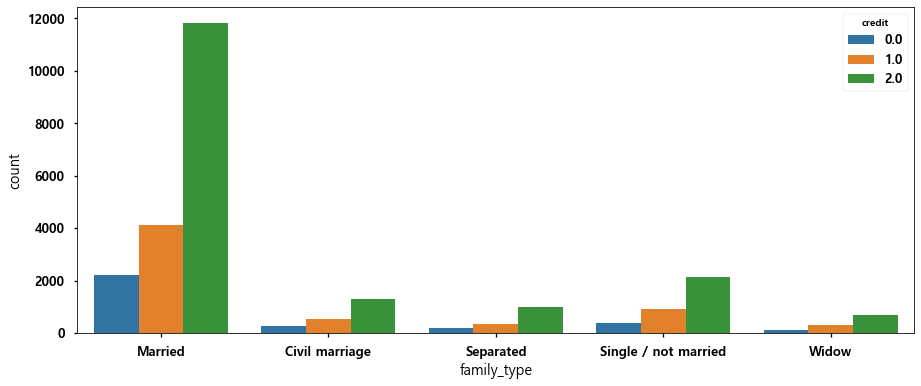

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('family_type',data=train, hue='credit')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  float64
 18  credit

In [ ]:
train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,F,N,N,0,202500.00,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,2.00,-6.00,1.00
1,F,N,Y,1,247500.00,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,3.00,-5.00,1.00
2,M,Y,Y,0,450000.00,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,2.00,-22.00,2.00
3,F,N,Y,0,202500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,2.00,-37.00,0.00
4,F,Y,Y,0,157500.00,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,2.00,-26.00,2.00


In [ ]:
test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,M,Y,N,0,112500.00,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,0,1,0,2.00,-60.00
1,F,N,Y,0,135000.00,State servant,Higher education,Married,House / apartment,-18964,-8671,0,1,0,2.00,-36.00
2,F,N,Y,0,69372.00,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,0,2.00,-40.00
3,M,Y,N,0,112500.00,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,0,0,2.00,-41.00
4,F,Y,Y,0,225000.00,State servant,Higher education,Married,House / apartment,-17822,-9385,1,0,0,2.00,-8.00


In [ ]:
#불필요한 칼럼 삭제
train.drop(['FLAG_MOBIL','index'],axis=1,inplace=True)

test.drop(['FLAG_MOBIL','index'],axis=1,inplace=True)

In [ ]:
train.shape, test.shape

((26457, 17), (10000, 16))

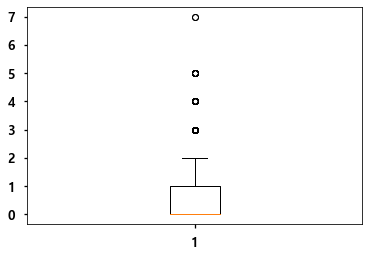

In [ ]:
plt.boxplot(train['child_num'])
plt.show()

In [ ]:
train = train.drop(train[train['child_num']>10].index, axis=0).reset_index(drop=True)
test = test.drop(train[train['child_num']>10].index, axis=0).reset_index(drop=True)

In [ ]:
train.shape, test.shape

((26453, 17), (10000, 16))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22015 entries, 0 to 22014
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         22015 non-null  object 
 1   car            22015 non-null  object 
 2   reality        22015 non-null  object 
 3   child_num      22015 non-null  int64  
 4   income_total   22015 non-null  float64
 5   income_type    22015 non-null  object 
 6   edu_type       22015 non-null  object 
 7   family_type    22015 non-null  object 
 8   house_type     22015 non-null  object 
 9   DAYS_BIRTH     22015 non-null  int64  
 10  DAYS_EMPLOYED  22015 non-null  int64  
 11  work_phone     22015 non-null  int64  
 12  phone          22015 non-null  int64  
 13  email          22015 non-null  int64  
 14  family_size    22015 non-null  float64
 15  begin_month    22015 non-null  float64
 16  credit         22015 non-null  float64
dtypes: float64(4), int64(6), object(7)
memory usage: 2

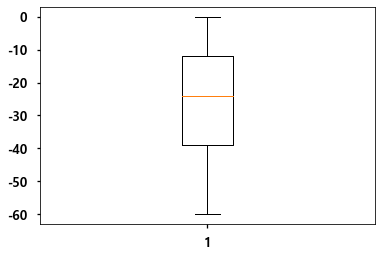

In [ ]:
plt.boxplot(train['begin_month'])
plt.show()

- DAYS_EMPLOYED 에서 이상하게 양수값이 매우높은 수치가 발견 해당 행 삭제

In [ ]:
train = train.drop(train[train['DAYS_EMPLOYED']>100000].index, axis=0).reset_index(drop=True)
test = test.drop(train[train['DAYS_EMPLOYED']>100000].index, axis=0).reset_index(drop=True)

- 범주형 처리

In [ ]:
category_df = train.select_dtypes(exclude=['int64','float64'])
numeric_df = train.select_dtypes(include=['int64','float64'])

In [ ]:
category_df

,gender,car,reality,income_type,edu_type,family_type,house_type
0,F,N,N,Commercial associate,Higher education,Married,Municipal apartment
1,F,N,Y,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment
2,M,Y,Y,Working,Higher education,Married,House / apartment
3,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment
4,F,Y,Y,State servant,Higher education,Married,House / apartment
...,...,...,...,...,...,...,...
22010,F,N,N,State servant,Secondary / secondary special,Married,House / apartment
22011,F,N,Y,Working,Higher education,Separated,House / apartment
22012,F,Y,N,Working,Secondary / secondary special,Civil marriage,With parents
22013,M,N,Y,Working,Incomplete higher,Single / not married,House / apartment


In [ ]:
numeric_df

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,202500.00,-13899,-4709,0,0,0,2.00,-6.00,1.00
1,1,247500.00,-11380,-1540,0,0,1,3.00,-5.00,1.00
2,0,450000.00,-19087,-4434,0,1,0,2.00,-22.00,2.00
3,0,202500.00,-15088,-2092,0,1,0,2.00,-37.00,0.00
4,0,157500.00,-15037,-2105,0,0,0,2.00,-26.00,2.00
...,...,...,...,...,...,...,...,...,...,...
22010,2,225000.00,-12079,-1984,0,0,0,4.00,-2.00,1.00
22011,1,180000.00,-15291,-2475,0,0,0,2.00,-47.00,2.00
22012,0,292500.00,-10082,-2015,0,0,0,2.00,-25.00,2.00
22013,0,171000.00,-10145,-107,0,0,0,1.00,-59.00,2.00


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le_dict = {} #LabelEncoder를 저장하는 사전
for item in category_df:
    le.fit(train[item])
    train[item] = le.transform(train[item].values)
    test[item] = le.transform(test[item].values)
    le_dict = le

In [ ]:
numeric_df

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,202500.00,-13899,-4709,0,0,0,2.00,-6.00,1.00
1,1,247500.00,-11380,-1540,0,0,1,3.00,-5.00,1.00
2,0,450000.00,-19087,-4434,0,1,0,2.00,-22.00,2.00
3,0,202500.00,-15088,-2092,0,1,0,2.00,-37.00,0.00
4,0,157500.00,-15037,-2105,0,0,0,2.00,-26.00,2.00
...,...,...,...,...,...,...,...,...,...,...
22010,2,225000.00,-12079,-1984,0,0,0,4.00,-2.00,1.00
22011,1,180000.00,-15291,-2475,0,0,0,2.00,-47.00,2.00
22012,0,292500.00,-10082,-2015,0,0,0,2.00,-25.00,2.00
22013,0,171000.00,-10145,-107,0,0,0,1.00,-59.00,2.00


(array([1.2837e+04, 7.3810e+03, 1.4340e+03, 1.9100e+02, 1.1400e+02,
        4.4000e+01, 3.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00]),
 array([  27000.,  181800.,  336600.,  491400.,  646200.,  801000.,
         955800., 1110600., 1265400., 1420200., 1575000.]),
 <BarContainer object of 10 artists>)

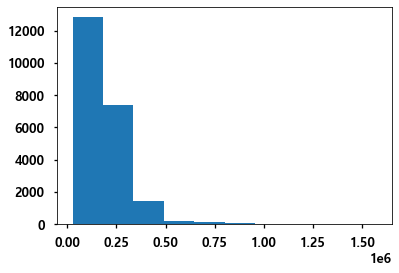

In [ ]:
plt.hist(train['income_total'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one = OneHotEncoder(sparse=False)

In [ ]:
one.fit(category_df)

OneHotEncoder(sparse=False)

In [ ]:
one.transform(category_df)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
one.get_feature_names()

array(['x0_F', 'x0_M', 'x1_N', 'x1_Y', 'x2_N', 'x2_Y',
       'x3_Commercial associate', 'x3_Pensioner', 'x3_State servant',
       'x3_Student', 'x3_Working', 'x4_Academic degree',
       'x4_Higher education', 'x4_Incomplete higher',
       'x4_Lower secondary', 'x4_Secondary / secondary special',
       'x5_Civil marriage', 'x5_Married', 'x5_Separated',
       'x5_Single / not married', 'x5_Widow', 'x6_Co-op apartment',
       'x6_House / apartment', 'x6_Municipal apartment',
       'x6_Office apartment', 'x6_Rented apartment', 'x6_With parents'],
      dtype=object)

In [ ]:
cate_XX = pd.DataFrame(one.transform(category_df), columns=one.get_feature_names())

In [ ]:
XX = pd.concat([numeric_df, cate_XX],axis=1, join='inner' )

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,202500.00,0,1,1,2,-13899,-4709,0,0,0,2.00,-6.00,1.00
1,0,0,1,1,247500.00,0,4,0,1,-11380,-1540,0,0,1,3.00,-5.00,1.00
2,1,1,1,0,450000.00,4,1,1,1,-19087,-4434,0,1,0,2.00,-22.00,2.00
3,0,0,1,0,202500.00,0,4,1,1,-15088,-2092,0,1,0,2.00,-37.00,0.00
4,0,1,1,0,157500.00,2,1,1,1,-15037,-2105,0,0,0,2.00,-26.00,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22010,0,0,0,2,225000.00,2,4,1,1,-12079,-1984,0,0,0,4.00,-2.00,1.00
22011,0,0,1,1,180000.00,4,1,2,1,-15291,-2475,0,0,0,2.00,-47.00,2.00
22012,0,1,0,0,292500.00,4,4,0,5,-10082,-2015,0,0,0,2.00,-25.00,2.00
22013,1,0,1,0,171000.00,4,2,3,1,-10145,-107,0,0,0,1.00,-59.00,2.00


- income_total, DAYS_EMPLOYED 분포를 정규분포 형태로 하기위해 로그릴?

In [ ]:
train['income_total'] = np.log1p(train['income_total'])
test['income_total'] = np.log1p(test['income_total'])

In [ ]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,0,0,0,0,12.22,0,1,1,2,-13899,-4709,0,0,0,2.00,-6.00
1,0,0,1,1,12.42,0,4,0,1,-11380,-1540,0,0,1,3.00,-5.00
2,1,1,1,0,13.02,4,1,1,1,-19087,-4434,0,1,0,2.00,-22.00
3,0,0,1,0,12.22,0,4,1,1,-15088,-2092,0,1,0,2.00,-37.00
4,0,1,1,0,11.97,2,1,1,1,-15037,-2105,0,0,0,2.00,-26.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22010,0,0,0,2,12.32,2,4,1,1,-12079,-1984,0,0,0,4.00,-2.00
22011,0,0,1,1,12.10,4,1,2,1,-15291,-2475,0,0,0,2.00,-47.00
22012,0,1,0,0,12.59,4,4,0,5,-10082,-2015,0,0,0,2.00,-25.00
22013,1,0,1,0,12.05,4,2,3,1,-10145,-107,0,0,0,1.00,-59.00


In [ ]:
y = train['credit']

In [ ]:
X = train.drop('credit', axis=1, inplace=True)

In [ ]:
X = train

In [ ]:
yy = XX['credit']


In [ ]:
XX.drop('credit',axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
cv= KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
rf_model = RandomForestClassifier()

In [ ]:
cross_val_score(rf_model, X, y, cv=cv)

array([0.70247558, 0.70247558, 0.70292982, 0.70724506, 0.70156711])

In [ ]:
cross_val_score(rf_model, XX, yy, cv=cv)

array([0.7027027 , 0.70338406, 0.70429253, 0.70542812, 0.69906882])

In [ ]:
rf_model.fit(X_train, y_train)
y_pred=rf_model.predict_proba(X_test)

print(f"log_loss: {log_loss(y_test, y_pred)}")

log_loss: 0.9405045967781533


In [ ]:
rf_model.feature_importances_, train.columns

(array([0.01917723, 0.01890878, 0.02036341, 0.0197383 , 0.10450026,
        0.02354946, 0.0236571 , 0.02514367, 0.01827204, 0.14800206,
        0.14906233, 0.01801717, 0.01947553, 0.01209098, 0.02514385,
        0.35489782]),
 Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
        'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
        'work_phone', 'phone', 'email', 'family_size', 'begin_month'],
       dtype='object'))

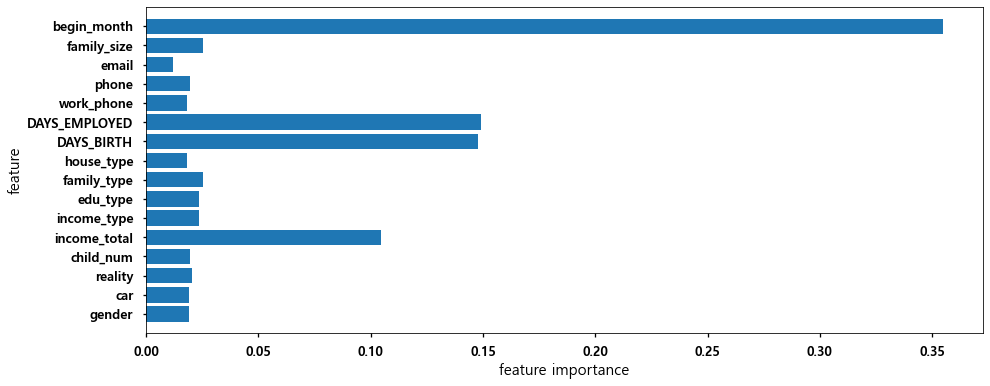

In [ ]:
plt.figure(figsize=(15,6))
n_feature = train.shape[1]

index = np.arange(n_feature)
plt.barh(index, rf_model.feature_importances_, align='center')

plt.yticks(index, train.columns)

plt.ylim(-1, n_feature)

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost

In [ ]:
ab = AdaBoostClassifier()
GBA = GradientBoostingClassifier()
xgb = xgboost.XGBClassifier(use_label_encoder=False)

In [ ]:
cross_val_score(ab, X, y, cv=cv)

array([0.68544174, 0.68635022, 0.69407222, 0.69225528, 0.69361799])

In [ ]:
cross_val_score(GBA, X, y, cv=cv)

array([0.68680445, 0.68816716, 0.69475358, 0.6924824 , 0.69384511])

In [ ]:
cross_val_score(xgb, XX, yy, cv=cv)

[13:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:53:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.70156711, 0.70883489, 0.71269589, 0.7115603 , 0.71383148])

In [ ]:
cross_val_score(xgb, X, y, cv=cv)

[13:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

array([0.70497388, 0.70928912, 0.71610266, 0.7115603 , 0.71019759])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(XX,yy, test_size=0.2, random_state=42)

In [ ]:
xgb.fit(X_train, y_train)

[13:55:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [ ]:
xgb.score(X_train,y_train)

0.7879286849875086

In [ ]:
test

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month
0,1,1,0,0,11.63,1,4,0,1,-21990,365243,0,1,0,2.00,-60.00
1,0,0,1,0,11.81,2,1,1,1,-18964,-8671,0,1,0,2.00,-36.00
2,0,0,1,0,11.15,4,4,1,1,-15887,-217,1,1,0,2.00,-40.00
3,1,1,0,0,11.63,0,4,1,1,-19270,-2531,1,0,0,2.00,-41.00
4,0,1,1,0,12.32,2,1,1,1,-17822,-9385,1,0,0,2.00,-8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,1,0,12.22,4,2,1,1,-18593,-5434,1,1,0,2.00,-19.00
9996,1,1,1,0,12.22,4,4,0,1,-10886,-1315,1,0,0,2.00,-34.00
9997,0,0,1,0,12.59,4,4,1,1,-21016,-14018,0,0,0,2.00,-55.00
9998,0,1,0,0,12.10,0,4,1,1,-16541,-1085,0,1,0,2.00,-33.00


In [ ]:
pred = xgb.predict(X_test)

In [ ]:
pred_1 = xgb.predict_proba(X_test)

In [ ]:
pd.DataFrame(pred_1)

,0,1,2
0,0.16,0.84,0.00
1,0.19,0.81,0.00
2,0.05,0.15,0.80
3,0.08,0.22,0.71
4,0.03,0.17,0.81
...,...,...,...
4398,0.17,0.11,0.72
4399,0.05,0.20,0.75
4400,0.07,0.22,0.71
4401,0.13,0.14,0.74


In [ ]:
xgb.score(X_test,y_test)

0.7049738814444697

In [ ]:
train

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X,y)

RandomForestClassifier()

In [ ]:
rf_model.score(X,y)

0.9720190779014308

In [ ]:
pred = rf_model.predict_proba(test)

In [ ]:
pd.DataFrame(pred)

,0,1,2
0,0.17,0.28,0.55
1,0.53,0.19,0.28
2,0.02,0.04,0.94
3,0.10,0.04,0.86
4,0.07,0.18,0.75
...,...,...,...
9995,0.03,0.24,0.73
9996,0.18,0.63,0.19
9997,0.02,0.04,0.94
9998,0.54,0.32,0.14


In [ ]:
submission

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
...,...,...,...,...
9995,36452,0,0,0
9996,36453,0,0,0
9997,36454,0,0,0
9998,36455,0,0,0


In [ ]:
submission.loc[:,1:]=pred

<ipython-input-250-d3d3128d3a5c>:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  submission.loc[:,1:]=pred


In [ ]:
submission.to_csv('baseline_submission.csv', index=False)